### **Import Needed Libraries**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
sns.set(style='whitegrid')

### **Read Data**

In [2]:
data_original = pd.read_csv(r'Ecommerce Customers.csv')
data = data_original.copy()

**Plot Head of Data Items**

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Get Data Info**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


-- The data is clean: no nans


**Get Statistical Analysis**

In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


-- Almost no outliers 

### **Exploratory Data Analysis (EDA)**

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

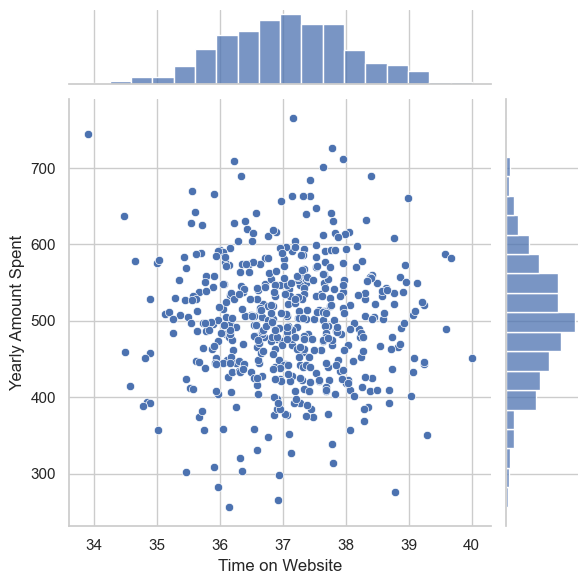

In [11]:
numerical_data = data.select_dtypes(include=['number'])
sns.jointplot(data=numerical_data, x='Time on Website', y='Yearly Amount Spent');

-- There is no correlation between yearly Amount Spent and Time spent on Website

**Do the same but with the Time on App column instead.**

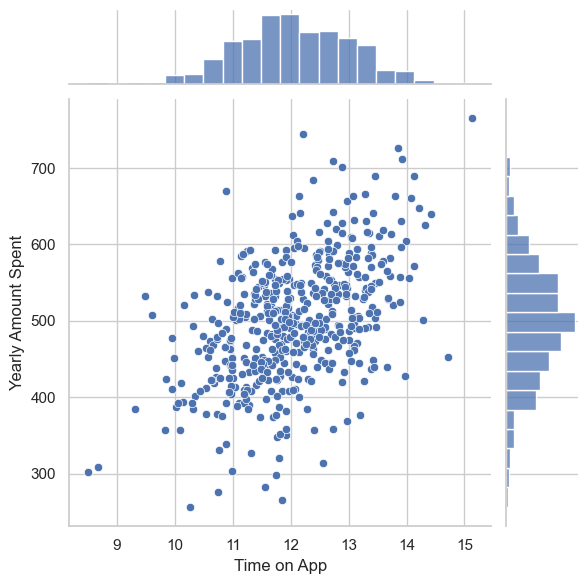

In [12]:
sns.jointplot(data=numerical_data, x='Time on App', y='Yearly Amount Spent');


-- There is a slight positive correlation between Time on App and Yearly Amount Spent

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

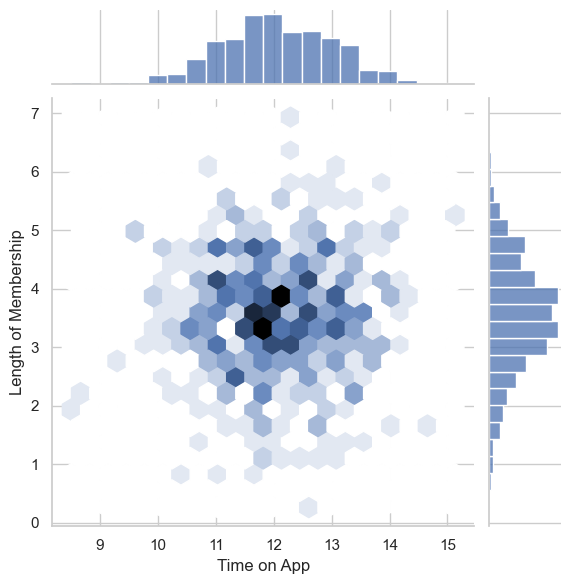

In [14]:
sns.jointplot(data=numerical_data, x='Time on App', y='Length of Membership', kind='hex');

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

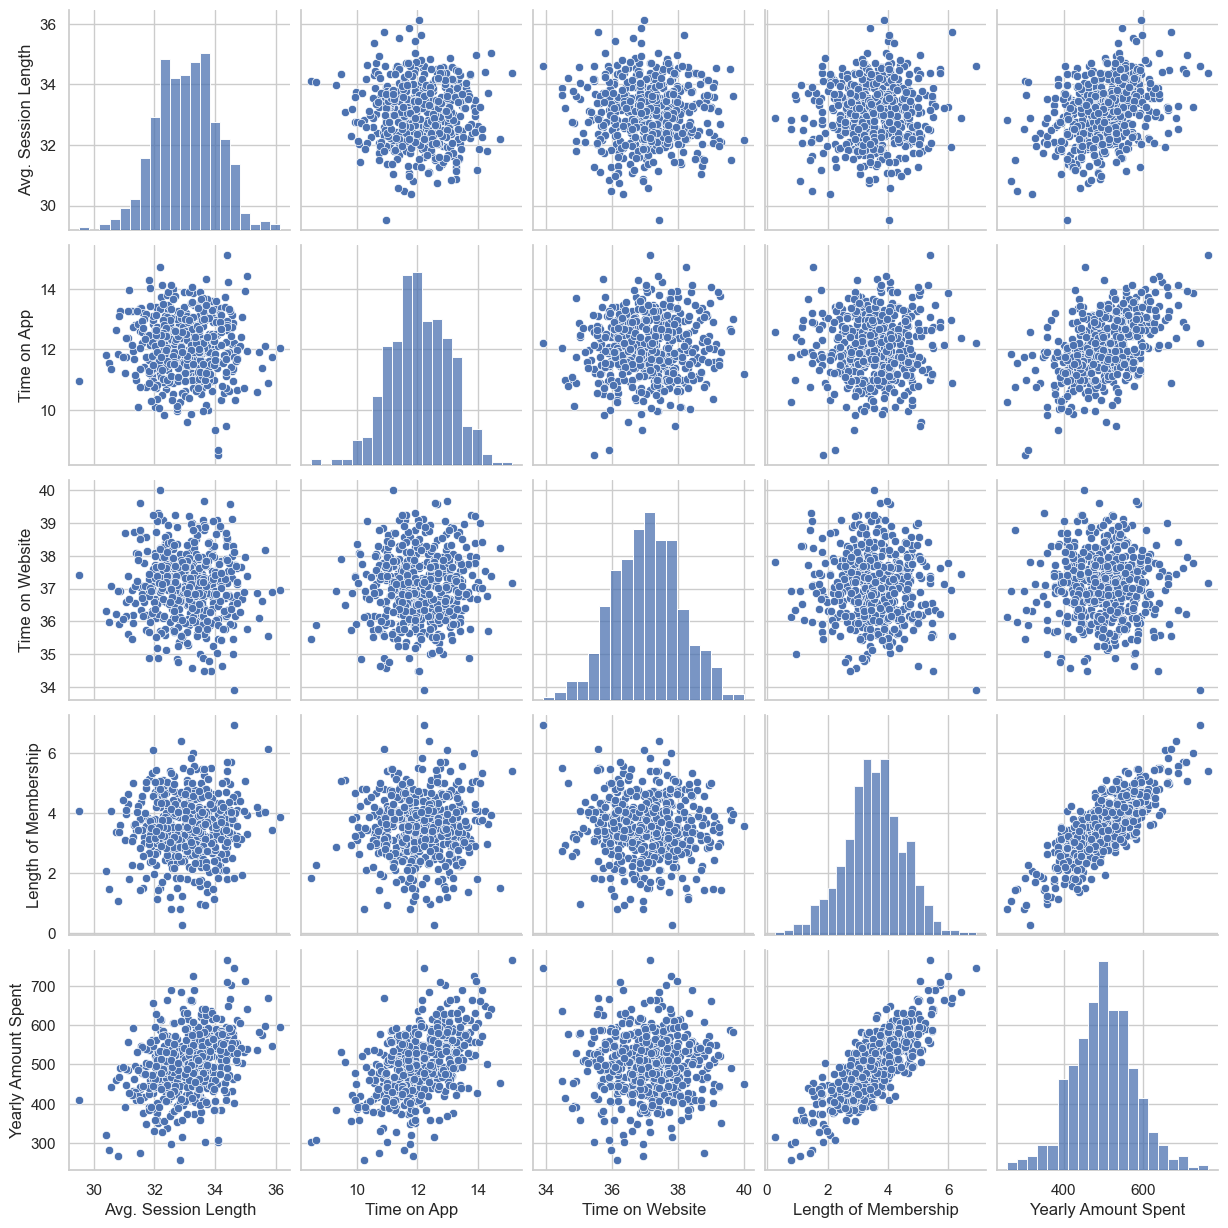

In [16]:
sns.pairplot(numerical_data);

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

-- The most positively correlated column with Yearly Amount Spent is : Length of Membership

In [23]:
numerical_data.corr()['Yearly Amount Spent'].sort_values(ascending=False)

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

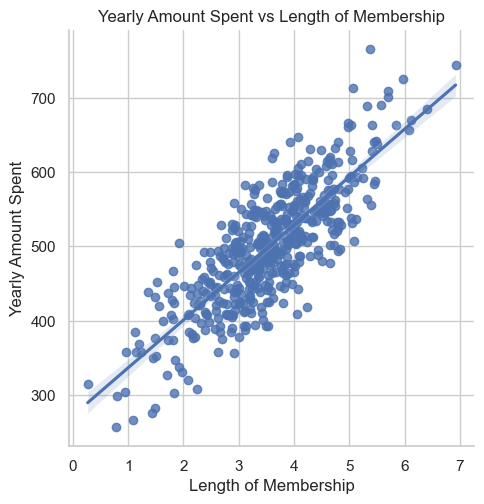

In [25]:
sns.lmplot(data= numerical_data, x='Length of Membership', y='Yearly Amount Spent')
plt.title('Yearly Amount Spent vs Length of Membership')
plt.show()

### **Data Prerprocessing**

**Define Features X and Target y**
- Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [32]:
X = numerical_data.iloc[:, :-1]
y = numerical_data.iloc[:, -1]

**Data Splitting**
- Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 4)
(150, 4)
(350,)
(150,)


### **Machine Learning Algorithms**

**Linear Regression**

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Print Model Score**

In [38]:
lr.score(X_train,y_train)

0.9817562058732432

**Get Prediction**

In [40]:
y_pred = lr.predict(X_test)

**Print MAE**

In [43]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}')

Mean Absolute Error: 7.228148653430845


**Print MSE**

In [44]:
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')

Mean Squared Error: 79.81305165097481


**Plotting real test values vs predicted values**

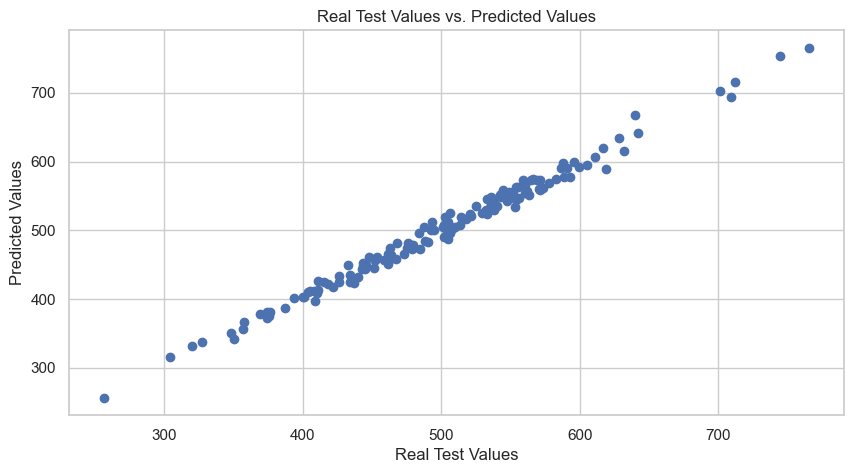

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(x=y_test, y=y_pred)
plt.title('Real Test Values vs. Predicted Values')
plt.ylabel('Predicted Values')
plt.xlabel('Real Test Values')
plt.show()


**Create a DataFrame to display the Linear Regression Coefficients**

In [68]:
coef_df = pd.DataFrame(index=X.columns , columns=['Coefficient'], data=lr.coef_)
coef_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**SGDRegressor**

In [58]:
sgd = SGDRegressor(eta0=0.12, learning_rate='constant', random_state=42)
sgd.fit(X_train,y_train)

SGDRegressor(eta0=0.12, learning_rate='constant', random_state=42)

**Print Model Score**

In [59]:
sgd.score(X_train,y_train)

-1.1817832066840042e+24

**Get Prediction**

In [61]:
y_pred = sgd.predict(X_test)

**Print MAE**

In [62]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}')

Mean Absolute Error: 83589099756845.89


**Print MSE**

In [63]:
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')

Mean Squared Error: 7.040301255076675e+27


**Plotting real test values vs predicted values**

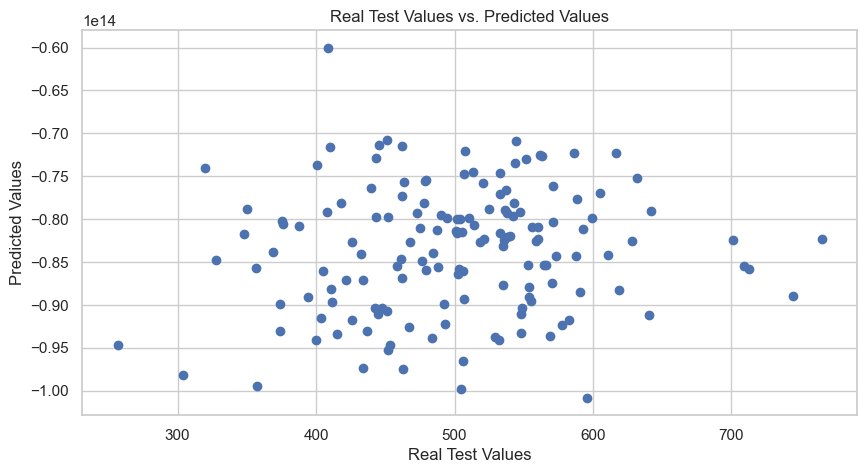

In [64]:
plt.figure(figsize=(10,5))
plt.scatter(x=y_test, y=y_pred)
plt.title('Real Test Values vs. Predicted Values')
plt.ylabel('Predicted Values')
plt.xlabel('Real Test Values')
plt.show()

**Create a DataFrame to display the Linear Regression Coefficients**

In [65]:
sgd.coef_

array([-6.02043344e+12,  7.18213179e+11,  2.57566652e+12,  3.37680807e+12])

In [67]:
coef_df = pd.DataFrame(index=X.columns , columns=['Coefficient'], data=sgd.coef_)
coef_df

,Coefficient
Avg. Session Length,-6.020433e+12
Time on App,7.182132e+11
Time on Website,2.575667e+12
Length of Membership,3.376808e+12
